In [2]:
import numpy as np  
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/imdb-10000-indian-movies/IMDB_10000.csv


>### Reading Data

In [3]:
df = pd.read_csv("/kaggle/input/imdb-10000-indian-movies/IMDB_10000.csv")

> ### Data info

In [4]:
df.head(4)

,title,year,certificate,runtime,genre,desc,rating,votes
0,Freddy,2022,UA 16+,124 min,"Drama, Mystery, Thriller",The lines between love and obsession blur in t...,7.9,"16,441"
1,An Action Hero,2022,U,130 min,Action,Youth Icon. Superstar. Action Hero. At the age...,8.1,"15,690"
2,Kantara,2022,UA,148 min,"Action, Adventure, Drama",It involves culture of Kambala and Bhootha Kol...,8.7,"78,358"
3,Khakee: The Bihar Chapter,2022–,UA 13+,45 min,"Action, Crime, Drama",As a righteous cop pursues a merciless crimina...,8.3,"4,464"


In [5]:
df.tail(4)

,title,year,certificate,runtime,genre,desc,rating,votes
9996,Aadmi Sadak Ka,1977,NaN,138 min,"Drama, Family",NaN,NaN,NaN
9997,Nadodi Mannan,1958,NaN,220 min,"Action, Adventure, Comedy",NaN,NaN,NaN
9998,Njan Marykutty,2018,U,126 min,Drama,NaN,NaN,NaN
9999,Paap Ko Jalaa Kar Raakh Kar Doonga,1988,UA,153 min,Crime,NaN,NaN,NaN


In [6]:
df.sample(4)

,title,year,certificate,runtime,genre,desc,rating,votes
1776,Madhagaja,2021,UA,132 min,"Action, Crime, Thriller","After being abandoned by his lover, Anshu, Poo...",7.2,"4,580"
2026,Soldier,II 1998,UA,156 min,"Action, Drama, Musical",Long-suffering heiress Seeta is treated worse ...,6.9,"1,933"
6357,Pratiggya,1975,U,NaN,"Action, Comedy, Drama",Anandi Devi is an old widow living in her vill...,7.6,594
1847,Swarajyarakshak Sambhaji,2017–,U,30 min,"Action, Biography, History","Sam Alex, a drunkard ex-cop, is forced to inve...",8.0,"7,356"


In [7]:
df.shape

(10000, 8)

>  Our Dataset has 10k records with 8 features

In [8]:
df.isna().sum()

title             0
year            264
certificate    3440
runtime        2062
genre           133
desc           1041
rating         1041
votes          1041
dtype: int64

In [9]:
print([col for col in df.columns if df[col].isna().sum()>0])

['year', 'certificate', 'runtime', 'genre', 'desc', 'rating', 'votes']


> above features have missing values, imputation can be done ,but here we aren't  building model,thats why imputing those features would result in misleading insights

In [10]:
#finding Dulpicates

df.duplicated().sum()

6

In [11]:
#Drop duplicates

df.drop_duplicates(inplace=True)

In [12]:
#Now check Again

df.duplicated().sum()

0

In [13]:
df.dropna(inplace=True)

In [14]:
df.describe()

,rating
count,5440.000000
mean,6.593235
std,1.522288
min,1.000000
25%,5.600000
50%,6.800000
75%,7.700000
max,10.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5440 entries, 0 to 8957
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        5440 non-null   object 
 1   year         5440 non-null   object 
 2   certificate  5440 non-null   object 
 3   runtime      5440 non-null   object 
 4   genre        5440 non-null   object 
 5   desc         5440 non-null   object 
 6   rating       5440 non-null   float64
 7   votes        5440 non-null   object 
dtypes: float64(1), object(7)
memory usage: 382.5+ KB


### Univaraite Analysis

In [16]:
import plotly.express as px

In [17]:
df["title"].value_counts()   #Here 9428 shows names are unique 

titles =df["title"].value_counts().index[:10]

title_occurence =df["title"].value_counts().values[:10]

fig = px.bar(x = titles,y = title_occurence,labels={"x":"Movie Title","y":"Repeated"},title="Movies With Same Titles",template="ggplot2",color_discrete_sequence =['green']*len(df)) #Top 10 Movies

fig.show()

In [18]:
certificate = df["certificate"].value_counts().index
certi_count =df["certificate"].value_counts().values
fi =px.bar(x=certi_count,y=certificate,labels={"x":"No of Movies","y":"Certificate"},title="Certificate Type ")
fi.update_layout(yaxis=dict(autorange="reversed"),title_x=0.5)

In [20]:
run_t = df["runtime"].value_counts().index
rt_count =df["runtime"].value_counts().values
fi =px.bar(y=run_t,x=rt_count,labels={"x":"No of Movies","y":"Runtime"},title="Runtime (Minutes) ")
fi.update_layout(yaxis=dict(autorange="reversed"),title_x=0.5)

In [21]:
#Top 6 Genres
genre = df["genre"].value_counts()
fig = px.pie(values = genre.values[:6],names=genre.index[:6],title="Top 6 Genres")
fig.update_layout(title_x=0.432)

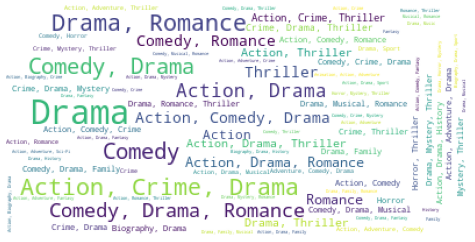

In [30]:
#World CLoud
import matplotlib.pyplot as plt
from wordcloud import WordCloud
genre = genre

genre.index=genre.index.map(str)
wordcloud = WordCloud(background_color="white").generate_from_frequencies(genre)
plt.figure(figsize = (12,8),dpi=50)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [23]:
genre

Drama                                        658
Drama, Romance                               271
Action, Crime, Drama                         266
Comedy                                       236
Comedy, Drama                                235
                                            ... 
Action, Crime, History                         1
Action, Thriller, Crime                        1
Animation, Adventure, History                  1
Drama, Sci-Fi                                  1
Horror, Romance, Sci-Fi                        1
Name: genre, Length: 361, dtype: int64

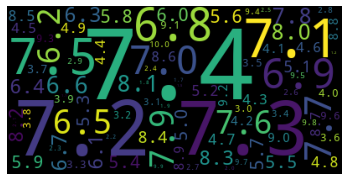

In [33]:
#Top 6 Genres
ratings = df["rating"].value_counts()
ratings.index=ratings.index.map(str)

wordcloud = WordCloud().generate_from_frequencies(ratings)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [34]:
#Converting votes to int
df["votes"] = df["votes"].str.replace(",","").astype("int")

In [35]:
#Top 15 Shows

top_15 = df.sort_values(["votes","rating"],ascending=False)[:15]
top_15.loc[:,["title","year","genre","rating","votes"]]

,title,year,genre,rating,votes
51,Life of Pi,2012,"Adventure, Drama, Fantasy",7.9,631341
17,1917,2019,"Action, Drama, War",8.2,586820
137,Uri: The Surgical Strike,2019,"Action, Drama, History",8.3,560667
72,The Bourne Supremacy,2004,"Action, Mystery, Thriller",7.7,465243
31,The Help,2011,Drama,8.1,460166
22,Ready Player One,2018,"Action, Adventure, Sci-Fi",7.4,437034
35,3 Idiots,2009,"Comedy, Drama",8.4,400751
78,Real Steel,2011,"Action, Drama, Sci-Fi",7.0,331227
39,Bridge of Spies,2015,"Drama, History, Thriller",7.6,312455
209,House of Secrets: The Burari Deaths,2021,"Documentary, Crime, History",9.2,297328


In [36]:
#Top Least Rated Shows
top_voted = df.sort_values("votes",ascending=False)
top_voted.sort_values("rating")

,title,year,certificate,runtime,genre,desc,rating,votes
5705,Disco Raja,2020,UA,141 min,"Action, Crime, Drama","It is a comedy about a group of six lovable, h...",1.0,336
703,Looop Lapeta,2022,16,131 min,"Action, Comedy, Crime","The film picks up where Sadak left off, revolv...",1.1,95988
7518,Aa Gale Lag Jaa,1973,U,148 min,"Action, Drama, Romance",'Jaya samhita' means Karna's journey. The Maha...,1.1,303
4133,Saath Nibhana Saathiya,2010–2017,12+,22 min,Family,Raja arrives in Mumbai looking for a job but e...,1.2,5914
3472,Hindutva,2022,UA,144 min,Drama,Dare and Lovely is a first Urdu-Hindi comedy f...,1.2,177
...,...,...,...,...,...,...,...,...
654,Mrs. Serial Killer,2020,16,106 min,"Crime, Drama, Thriller",Parth Samthaan and Niti Taylor return as the p...,10.0,85
4252,Gair Kaanooni,1989,U,152 min,"Action, Comedy, Drama",The web series is about Aditya and Vani. Two y...,10.0,6666
8200,Ajay,2006,U,158 min,"Action, Drama, Romance",This is a Slice of Life story of a young coupl...,10.0,8
2008,Pratiksha,2021–,18,21 min,Mystery,Add a Plot,10.0,28
